# Data acquisition test

This notebook is used to better understand the dataset and how to use it. It is not intended to be used for training the model. Specifically, we are also testing the use of our preprocessing functions.

Use pytorch's Dataset interface to prepare the data for training. Note: the entire notebook was run on Kaggle to avoid downloading the data to my local machine. The data is available on Kaggle [here](https://www.kaggle.com/datasets/datamunge/sign-language-mnist). To run this exact code, you can upload the notebook to Kaggle and get the dataset from the link above.

Data processing was partially inspired by [this](https://www.digitalocean.com/community/tutorials/how-to-build-a-neural-network-to-translate-sign-language-into-english) tutorial.

## Imports

In [1]:
from torch.utils.data import Dataset
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import pandas as pd

from visualisation_utils import plot_images, plot_image, get_image
from preprocessing_utils import ASLDataset

## Data visualisation

In [20]:
data = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

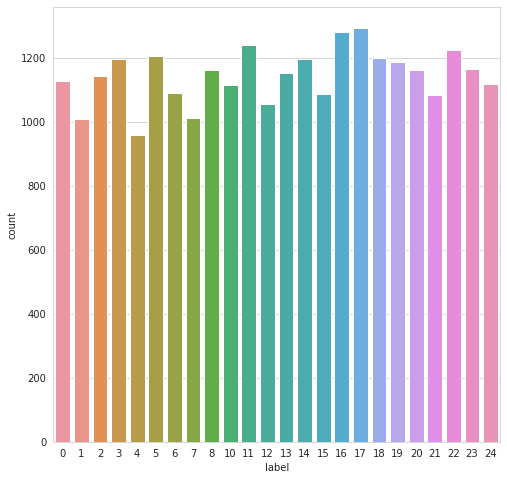

In [23]:
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.countplot(data['label'])

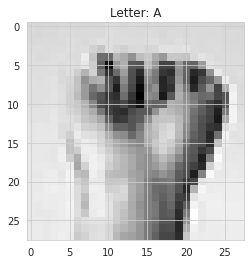

In [83]:
plot_image('a', data)

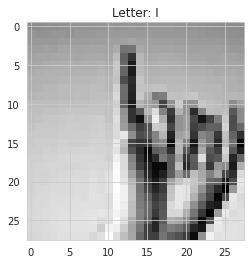

In [84]:
plot_image('i', data)

In [85]:
plot_image('z', data)

letter z not found


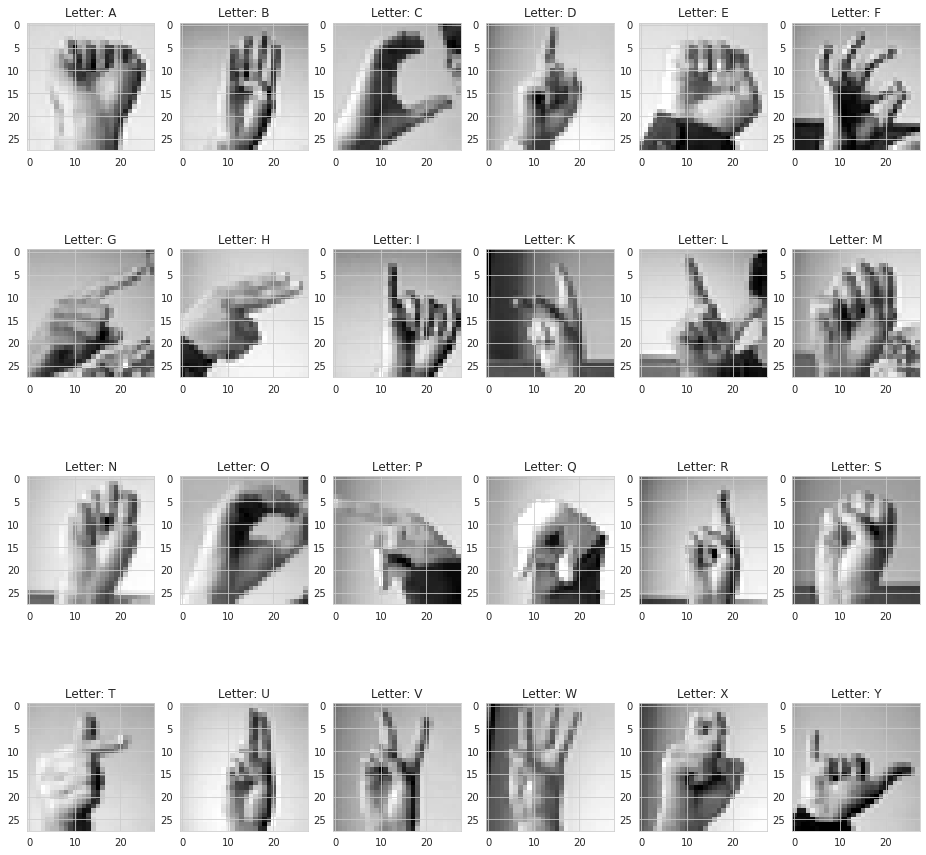

In [89]:
plot_images(data)

## Testing the Dataset class

In [15]:
def get_train_test_dataloader(train_path:str, test_path: str, batch_size=32, num_workers=4):
    train_dataset = ASLDataset(train_path)
    test_dataset = ASLDataset(test_path)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

    return train_loader, test_loader

In [18]:
train_path = '/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv'
test_path = '/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv'
train_loader, test_loader = get_train_test_dataloader(train_path, test_path)

In [19]:
print(next(iter(train_loader)))

{'image': tensor([[[[-3.2556, -3.2554, -3.2555,  ..., -3.2531, -3.2532, -3.2531],
          [-3.2556, -3.2554, -3.2554,  ..., -3.2531, -3.2531, -3.2531],
          [-3.2556, -3.2554, -3.2553,  ..., -3.2531, -3.2531, -3.2530],
          ...,
          [-3.2559, -3.2556, -3.2554,  ..., -3.2597, -3.2598, -3.2599],
          [-3.2584, -3.2582, -3.2581,  ..., -3.2592, -3.2595, -3.2597],
          [-3.2593, -3.2593, -3.2592,  ..., -3.2589, -3.2590, -3.2595]]],


        [[[-3.2662, -3.2534, -3.2533,  ..., -3.2662, -3.2662, -3.2662],
          [-3.2662, -3.2534, -3.2532,  ..., -3.2508, -3.2507, -3.2507],
          [-3.2662, -3.2534, -3.2533,  ..., -3.2508, -3.2507, -3.2508],
          ...,
          [-3.2552, -3.2552, -3.2552,  ..., -3.2559, -3.2559, -3.2662],
          [-3.2552, -3.2552, -3.2552,  ..., -3.2559, -3.2559, -3.2662],
          [-3.2662, -3.2662, -3.2662,  ..., -3.2559, -3.2559, -3.2662]]],


        [[[-3.2662, -3.2662, -3.2662,  ..., -3.2531, -3.2532, -3.2662],
          [-3.25